In [32]:
# Importation des librairies nécessaires
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [18]:
# Chargement des ensembles de données
breast_cancer_data = pd.read_csv('./data/Breast-cancer-Wisconsin.csv')
diabetes_data = pd.read_csv('./data/Pima-indians-diabetes.csv')

# Affichage des premières lignes pour vérifier le chargement
print("Breast Cancer Dataset:")
print(breast_cancer_data.head())

print("\nDiabetes Dataset:")
print(diabetes_data.head())


Breast Cancer Dataset:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...       

In [19]:
# Préparation des données pour le cancer du sein
X_breast_cancer = breast_cancer_data.drop(columns=['diagnosis'])
y_breast_cancer = breast_cancer_data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Préparation des données pour le diabète
X_diabetes = diabetes_data.drop(columns=['Outcome'])
y_diabetes = diabetes_data['Outcome']

# Division des ensembles de données en échantillons d'apprentissage et de test (80% - 20%)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)


In [20]:
# Normalisation des variables explicatives pour le modèle de cancer du sein
scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)

# Normalisation des variables explicatives pour le modèle de diabète
scaler_dia = StandardScaler()
X_train_dia = scaler_dia.fit_transform(X_train_dia)
X_test_dia = scaler_dia.transform(X_test_dia)


In [21]:
# Enregistrement du modèle cancer
best_model_bc = "best_model_bc.h5.keras"

model_ckp = ModelCheckpoint(filepath=best_model_bc,
                            monitor="accuracy", mode="max", save_best_only=True)

In [22]:
# Modèle de réseau de neurones pour le cancer du sein
model_bc = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_bc.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_bc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h = model_bc.fit(X_train_bc, y_train_bc, epochs=50, validation_data=(X_test_bc, y_test_bc), callbacks=[model_ckp])


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7057 - loss: 0.6005 - val_accuracy: 0.9474 - val_loss: 0.4429
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8383 - loss: 0.4663 - val_accuracy: 0.9737 - val_loss: 0.3307
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8761 - loss: 0.3710 - val_accuracy: 0.9737 - val_loss: 0.2526
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9169 - loss: 0.2951 - val_accuracy: 0.9825 - val_loss: 0.1945
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8946 - loss: 0.2894 - val_accuracy: 0.9825 - val_loss: 0.1586
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9042 - loss: 0.2221 - val_accuracy: 0.9825 - val_loss: 0.1325
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9313 - loss: 0.1953 - val_accuracy: 0.9737 - val_loss: 0.1140
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9691 - loss: 0.1541 - val_accuracy: 0.9737 - v

In [39]:
# Enregistrement du modèle diabète
best_model_dia = "best_model_dia.h5.keras"

model_ckp = ModelCheckpoint(filepath=best_model_dia,
                            monitor="accuracy", mode="max", save_best_only=True)

In [40]:
# Modèle de réseau de neurones pour le diabète
model_dia = Sequential([
    Dense(9, activation='relu', input_shape=(X_train_dia.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_dia.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

h = model_dia.fit(X_train_dia, y_train_dia, epochs=50, validation_data=(X_test_dia, y_test_dia), callbacks=[model_ckp])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5007 - loss: 0.7347 - val_accuracy: 0.5779 - val_loss: 0.7081
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5777 - loss: 0.7134 - val_accuracy: 0.6234 - val_loss: 0.6904
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5793 - loss: 0.7145 - val_accuracy: 0.6364 - val_loss: 0.6756
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6072 - loss: 0.6919 - val_accuracy: 0.6623 - val_loss: 0.6618
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6047 - loss: 0.6896 - val_accuracy: 0.6818 - val_loss: 0.6502
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6023 - loss: 0.6793 - val_accuracy: 0.6558 - val_loss: 0.6387
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6487 - loss: 0.6524 - val_accuracy: 0.6558 - val_loss: 0.6273
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6067 - loss: 0.6525 - val_accuracy: 0.6623 - va

In [41]:
def plot_loss_curve(history):
    plt.plot(list(range(len(history['loss']))), history['loss'], label="loss")
    plt.plot(list(range(len(history['val_loss']))), history['val_loss'], label="val_loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss curve')
    plt.legend(loc='upper right')
    plt.show()

def plot_accuracy_curve(history):
    plt.plot(list(range(len(history['accuracy']))), history['accuracy'], label="accuracy")
    plt.plot(list(range(len(history['val_accuracy']))), history['val_accuracy'], label="val_accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Accuracy curve')
    plt.legend(loc='upper right')
    plt.show()

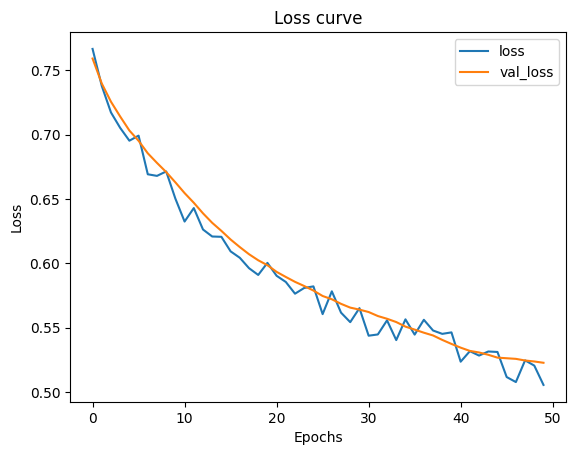

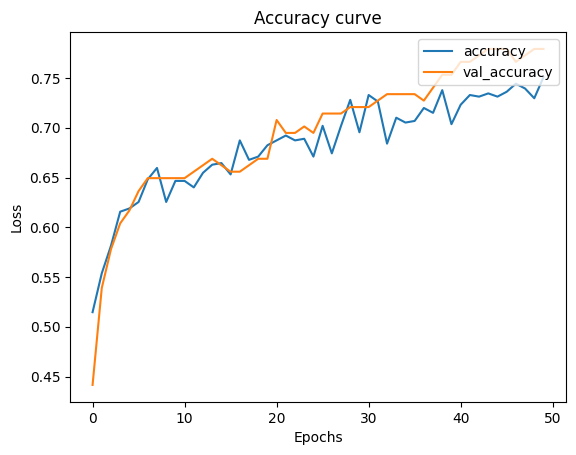

In [26]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

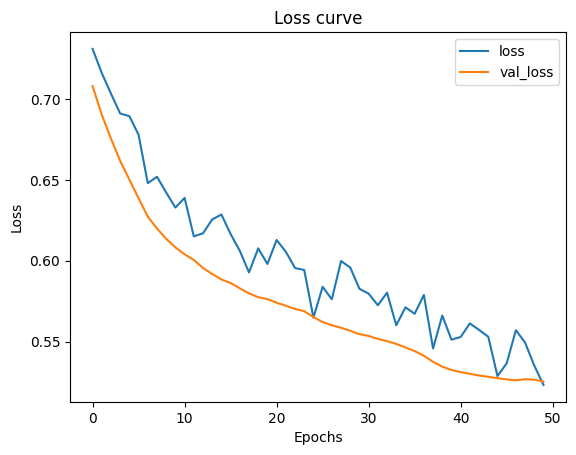

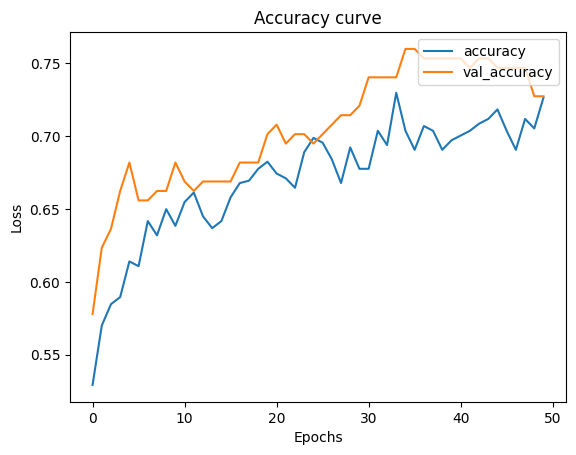

In [42]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [28]:
# Charger le modèle à partir du fichier
model_loaded_bc = tf.keras.models.load_model('./best_model_bc.h5.keras')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matrice de confusion (Cancer du sein) :
[[70  1]
 [ 1 42]]

Rapport de classification (Cancer du sein) :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Text(113.9222222222222, 0.5, 'classes reelles')

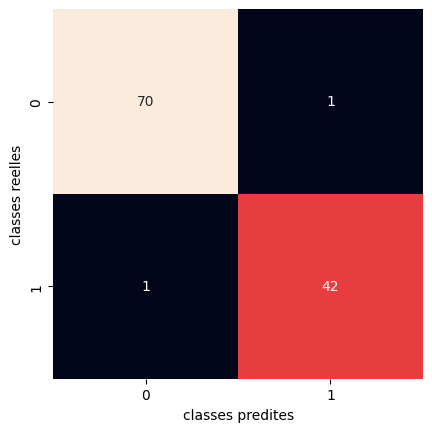

In [36]:
# Évaluation du modèle pour le cancer du sein
y_pred_bc = (model_loaded_bc.predict(X_test_bc) > 0.5).astype("int32")
print("Matrice de confusion (Cancer du sein) :")
conf = confusion_matrix(y_test_bc, y_pred_bc)
print(conf)
print("\nRapport de classification (Cancer du sein) :")
print(classification_report(y_test_bc, y_pred_bc))

# print('matrice de confusion\n',conf)
sns.heatmap(conf,square=True,annot=True,cbar=False)

plt.xlabel('classes predites')
plt.ylabel('classes reelles')

In [30]:
# Charger le modèle à partir du fichier
model_loaded_dia = tf.keras.models.load_model('./best_model_dia.h5.keras')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Matrice de confusion (Diabète) :
[[87 12]
 [22 33]]

Rapport de classification (Diabète) :
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



Text(113.9222222222222, 0.5, 'classes reelles')

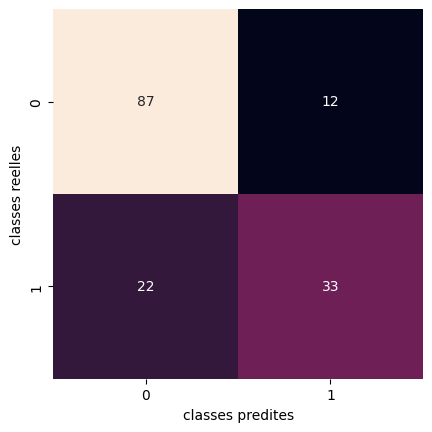

In [37]:
# Évaluation du modèle pour le diabète
y_pred_dia = (model_loaded_dia.predict(X_test_dia) > 0.5).astype("int32")
print("Matrice de confusion (Diabète) :")
conf = confusion_matrix(y_test_dia, y_pred_dia)
print(conf)
print("\nRapport de classification (Diabète) :")
print(classification_report(y_test_dia, y_pred_dia))

sns.heatmap(conf,square=True,annot=True,cbar=False)

plt.xlabel('classes predites')
plt.ylabel('classes reelles')